<a href="https://colab.research.google.com/github/GeneSUN/time-series-analysis-toolkit/blob/main/Analyzing_trends_seasonality_heteroscedasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download the script
!wget -O time_series_inspectors.py "https://raw.githubusercontent.com/GeneSUN/time-series-analysis-toolkit/main/Analyzing%20and%20Visualizing/time_series_inspectors.py"

from time_series_inspectors import BaseTimeSeriesInspector, TrendInspector, SeasonalityInspector, HeteroscedasticityInspector

import warnings
warnings.filterwarnings('ignore')


--2025-09-23 21:56:16--  https://raw.githubusercontent.com/GeneSUN/time-series-analysis-toolkit/main/Analyzing%20and%20Visualizing/time_series_inspectors.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14631 (14K) [text/plain]
Saving to: ‘time_series_inspectors.py’

time_series_inspect 100%[===================>]  14.29K  --.-KB/s    in 0.001s  

2025-09-23 21:56:16 (14.3 MB/s) - ‘time_series_inspectors.py’ saved [14631/14631]



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/GeneSUN/time-series-analysis-toolkit/main/Data/df_cap_hour_pd.csv"
df_cap_hour_pd = pd.read_csv(url)

# Rename columns
df_cap_hour_pd = df_cap_hour_pd.rename(columns={'avg_4gsnr': 'feature1', 'avg_5gsnr': 'feature2'})

print(df_cap_hour_pd.head())

            sn                           hour  feature1  feature2
0  ABB30701372  2025-03-27T19:00:00.000-04:00      14.0      31.0
1  ABB30701372  2025-03-27T20:00:00.000-04:00      15.0      32.0
2  ABB30701372  2025-03-27T21:00:00.000-04:00      14.0      33.0
3  ABB30701372  2025-03-27T22:00:00.000-04:00      15.0      33.0
4  ABB30701372  2025-03-27T23:00:00.000-04:00      15.0      33.0


# BaseTimeSeriesInspector

## Original Time Series


1. 📈 Plot Original Time Series

--- 🔍 Step: Visual Inspection ---
Purpose: Observe overall shape, amplitude, and possible patterns.



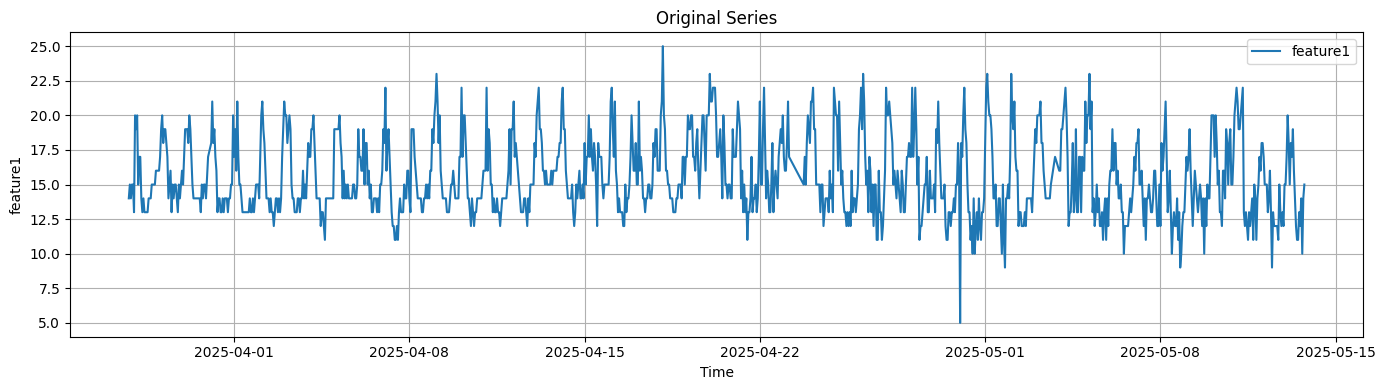

In [ ]:

base_inspector = BaseTimeSeriesInspector(df_cap_hour_pd, datetime_col='hour', value_col='feature1')
print("\n1. 📈 Plot Original Time Series")
base_inspector.plot_series()


## plot_rolling_stats


--- 📉 Step: Rolling Mean and Standard Deviation (window=24) ---
Purpose: Detect shifting average or variability over time.



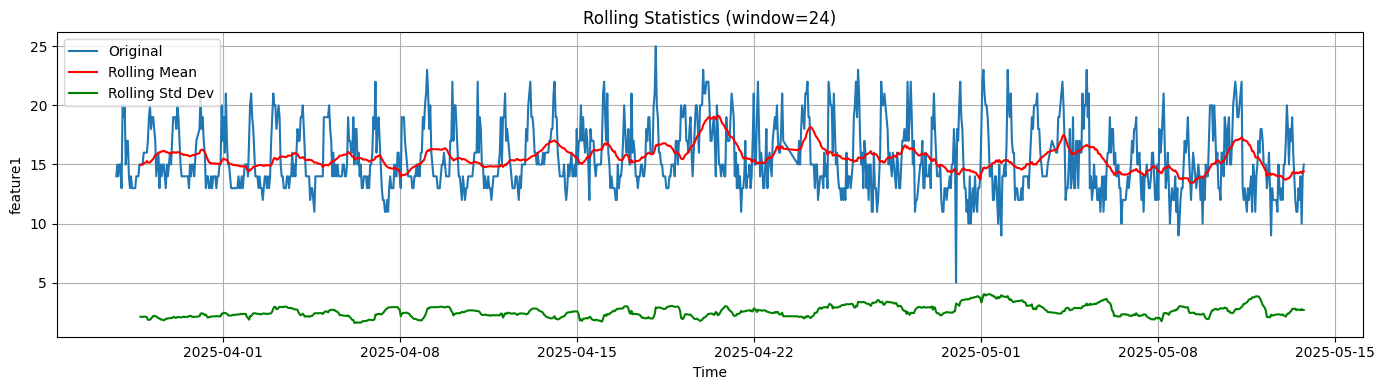

In [ ]:
base_inspector.rolling_mean_std(window=24)

# TrendInspector



## Autocorrelation Function(ACF)  plot

Example:
* Autocorrelation Function (ACF) measures correlation between a time series and its own lags.

* In a stationary series (no trend), correlations typically drop off quickly after a few lags.

* In a trending series, autocorrelation tends to decay slowly (values remain high even at larger lags).



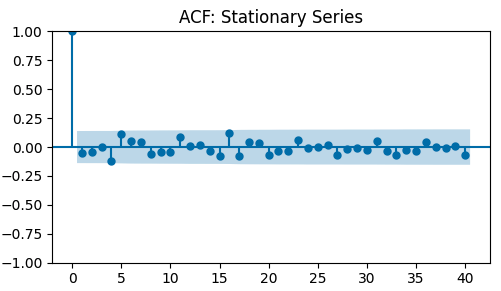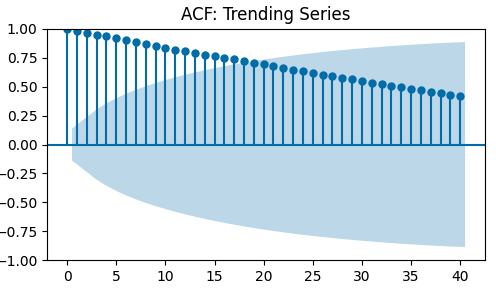


1. 📈 Plot Original Time Series

--- 🔁 Step: Autocorrelation Function (ACF, lags=100) ---
Purpose: Slow decay in ACF suggests trend.



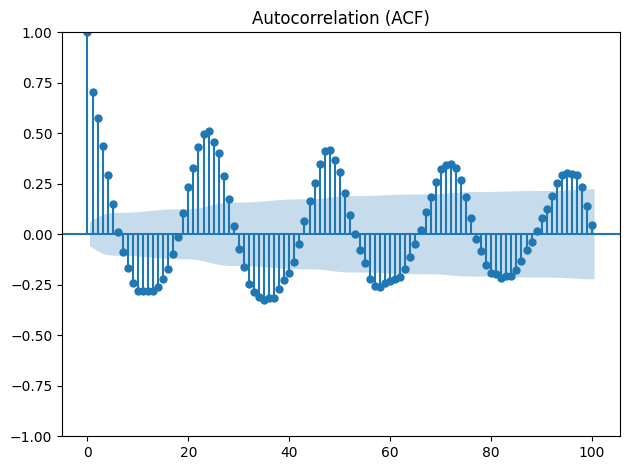

In [ ]:

trend_inspector = TrendInspector(df_cap_hour_pd, datetime_col='hour', value_col='feature1')
print("\n1. 📈 Plot Original Time Series")
trend_inspector.visualize_acf()


## Augmented Dickey-Fuller (ADF) Test

In [ ]:
trend_inspector.adf_test()


--- 🧪 Step: Augmented Dickey-Fuller (ADF) Test ---
Purpose: Test for stationarity. Null hypothesis: series is non-stationary (has a trend).

ADF Statistic     : -3.8704
p-value           : 0.0023
Used Lag          : 22
Number of Obs     : 1079
Critical Values   :
   1%: -3.4364
   5%: -2.8642
   10%: -2.5682

✅ Interpretation: The null hypothesis is rejected.
→ The series is likely stationary (no significant trend).


# SeasonalityInspector

In [ ]:
inspector = SeasonalityInspector(df_cap_hour_pd,
                                  datetime_col="hour",
                                  value_col="feature1",
                                  group_by="weekday",
                                 seasonal_period=24)

[INFO] Detected seasonal period: 24



--- 📦 Step: Seasonal Box Plot by Weekday ---
Purpose: Reveal repeated patterns in data by grouping by weekday.



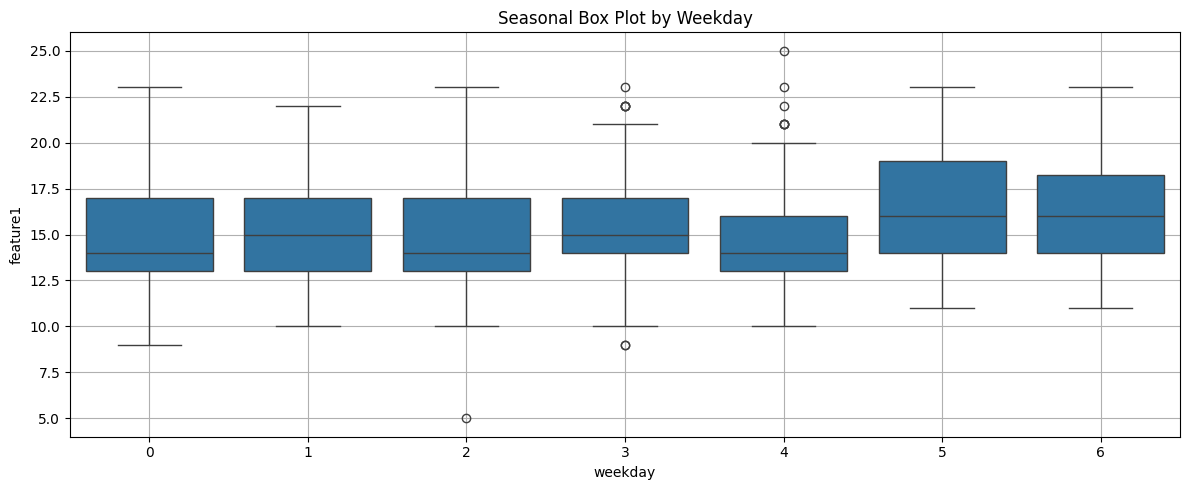

In [ ]:
#@title plot_seasonal_box
inspector.plot_seasonal_box()


--- 🔁 Step: Autocorrelation Function (ACF, lags=100) ---
Purpose: Repeating spikes suggest presence of seasonality.



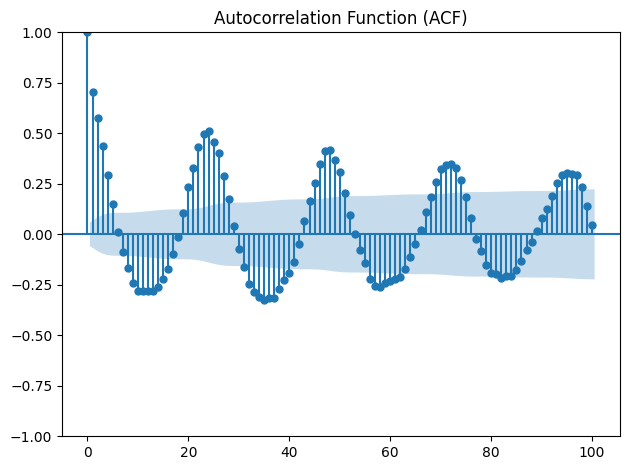

In [ ]:
#@title Autocorrelation Function
inspector.visualize_acf()


--- 🧩 Step: STL Decomposition ---
Purpose: Extract seasonal component from the time series.



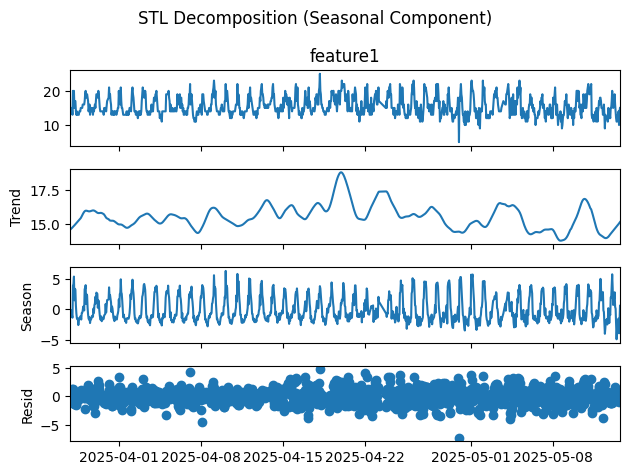

In [ ]:
#@title decompose_stl
inspector.decompose_stl()

In [ ]:
#@title seasonality_strength explained by variance
inspector.seasonality_strength()


--- 📊 Step: Seasonality Strength ---
Purpose: Measure how much variance is explained by seasonal vs residual components.

Variance(Observed) : 7.6268
Variance(Seasonal) : 4.2668
Variance(Residual) : 1.8030
Seasonality Strength (VarSeasonal / VarObserved): 55.95%
Residual Strength   (VarResidual / VarObserved): 23.64%
→ Seasonality is strong (>20%).
→ Low residual variance (<50%): strong signal from trend/seasonality, less stationary.


(np.float64(0.5594516602939112), np.float64(0.23639796892789658))

# HeteroscedasticityInspector

In [ ]:
inspector = HeteroscedasticityInspector(df_cap_hour_pd,
                                  datetime_col="hour",
                                  value_col="feature1",
                                  lags = 24)

## plot_residuals


--- 🔍 Step: Residual Plot ---
Purpose: Check if residual variance changes over time.



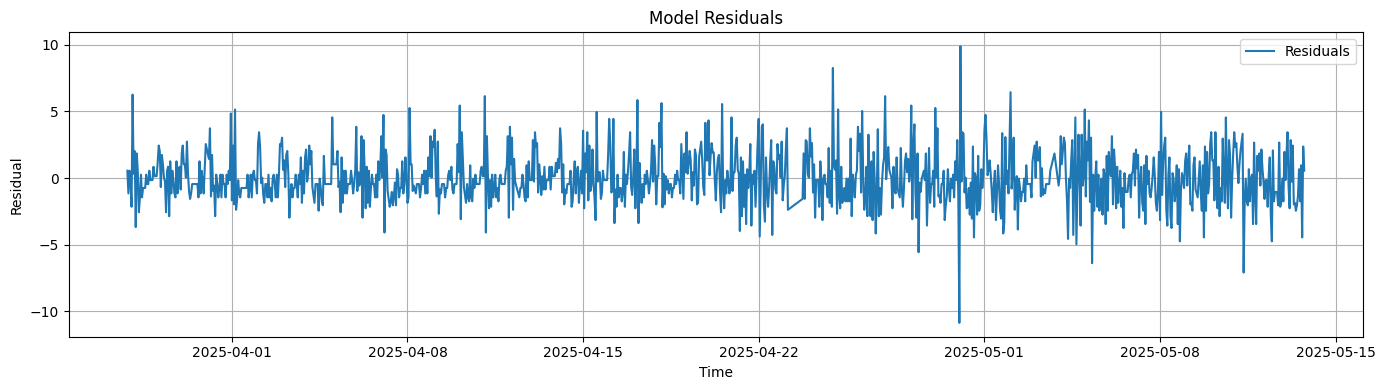

In [ ]:
inspector.plot_residuals()

## Autoregressive Conditional Heteroscedasticity test

In [ ]:
inspector.arch_test()


--- 🧪 Step: ARCH Test ---
Purpose: Detect time-varying volatility using 24 lags.

ARCH Test Statistic : 81.1758
p-value             : 0.0000

❌ Interpretation: Reject null hypothesis of homoscedasticity.
→ The variance is likely **not constant** (heteroscedastic).


## Variance-Stabilizing Transforms
If detected as heteroscadasticity, you may use log/sqrt transforms to stablize variance


--- 🔁 Step: Variance-Stabilizing Transforms ---
Purpose: Apply log/sqrt transforms to reduce changing variance effects.



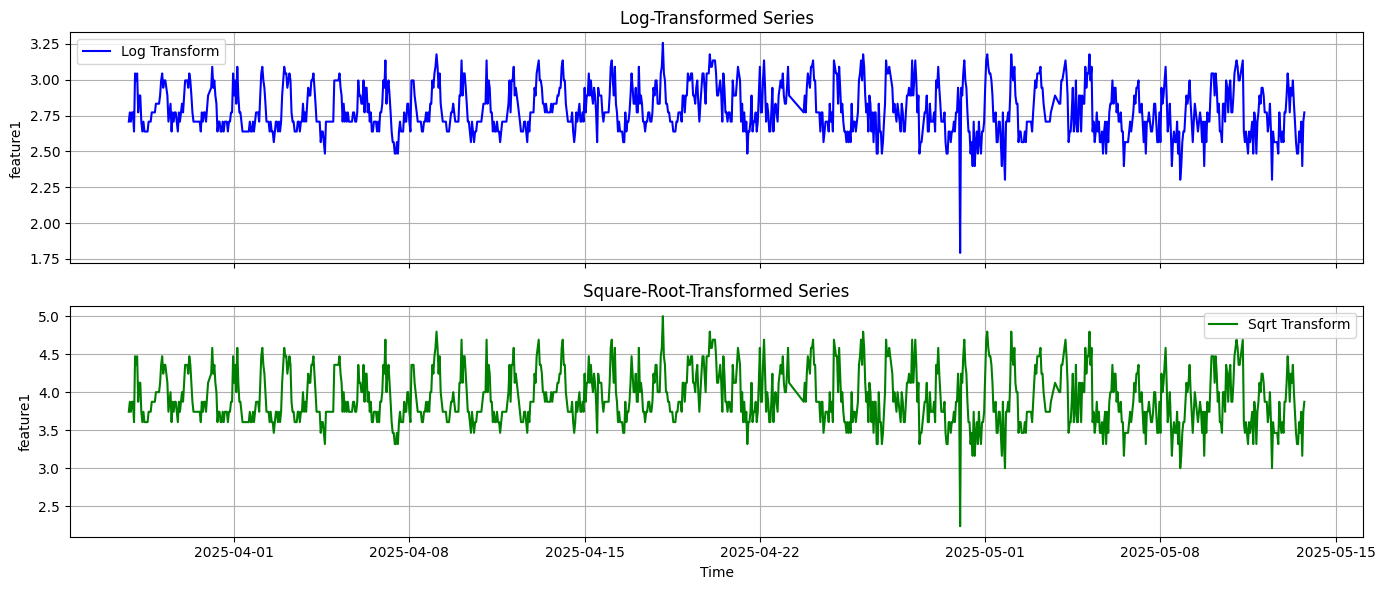

In [ ]:
inspector.plot_transforms()